# Predicting Heart Disease

In [303]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [304]:
df = pd.read_csv('Heart.csv')

In [305]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [185]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [186]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
#re-map column values
df.replace({'sex': {0:'female', 1: 'male'},
           'cp': {0: 'typical_angina', 1: 'atypical_angina', 2: 'non-anginal_pain', 3: 'asymptomatic'} }, inplace=True) 

In [307]:
#turn 1 into 3 and so on
#get rid of 0 in dummy creation
df.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [ ]:
# create function for creating dummies

# Categorical EDA

In [269]:
categorical_df = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']]

In [270]:
categorical_df.head()

,sex,cp,fbs,restecg,exang,slope,thal
0,1,3,1,0,0,0,1
1,1,2,0,1,0,0,2
2,0,1,0,0,0,2,2
3,1,1,0,1,0,2,2
4,0,0,0,1,1,2,2


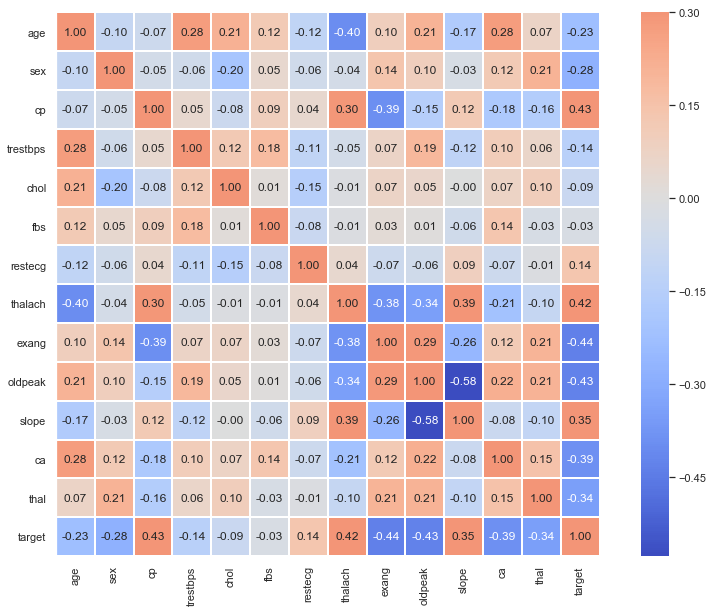

In [218]:
corr_cat = categorical.corr()
heatmap = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 1}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
heatmap.figure.set_size_inches(15,10)
    
plt.show()

In [240]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [256]:
def barplot(x_val, y_val='target',data=df):
    barplot = sns.barplot(x=x_val,y=y_val,data=data)
    return barplot

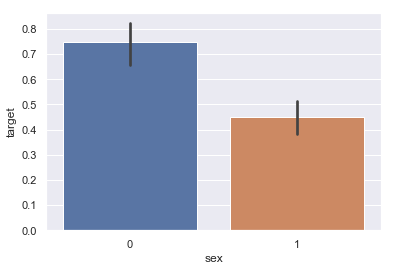

In [257]:
barplot('sex')

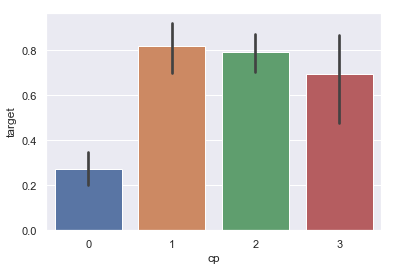

In [258]:
barplot('cp')

In [253]:
# for feature in categorical:
#     print(sns.barplot(x= feature, y = 'target', data= df)

[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a32845898>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a316f84e0>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a317ec438>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3174e518>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a31965518>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a319540b8>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a31bd8550>]]


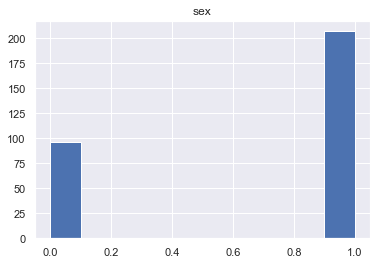

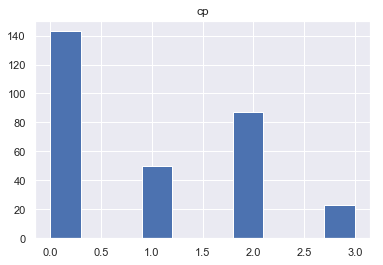

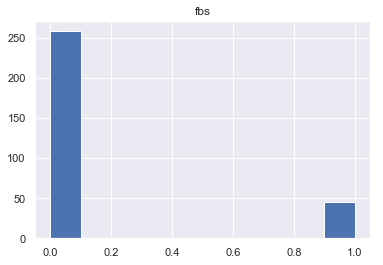

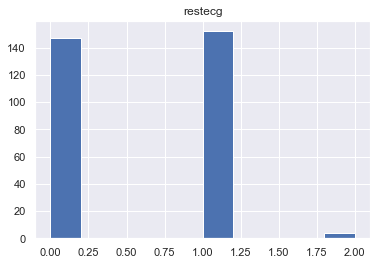

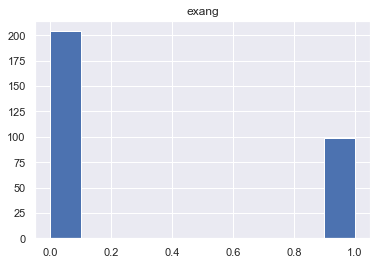

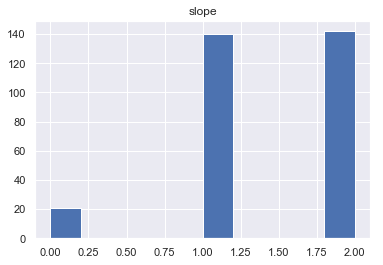

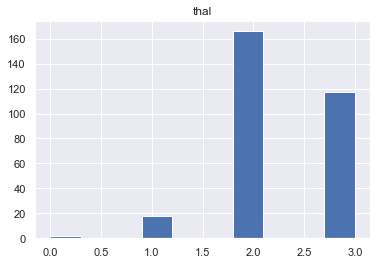

In [232]:
for feature in categorical:
    print(df.hist(feature))

# Continuous EDA

In [271]:
continuous_df = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'target']]

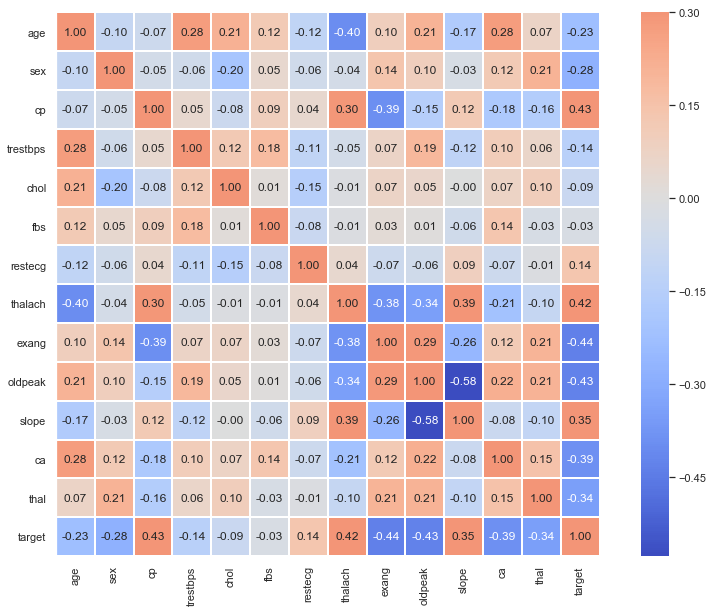

In [224]:
corr_con = continuous.corr()
heatmap = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 1}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
heatmap.figure.set_size_inches(15,10)
    
plt.show()

In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [277]:
example_df = df[['age', 'trestbps', 'chol', 'sex', 'target']]

In [283]:
df.groupby('target').mean().T

target,0,1
age,56.601449,52.496970
sex,0.826087,0.563636
cp,0.478261,1.375758
trestbps,134.398551,129.303030
chol,251.086957,242.230303
fbs,0.159420,0.139394
restecg,0.449275,0.593939
thalach,139.101449,158.466667
exang,0.550725,0.139394
oldpeak,1.585507,0.583030


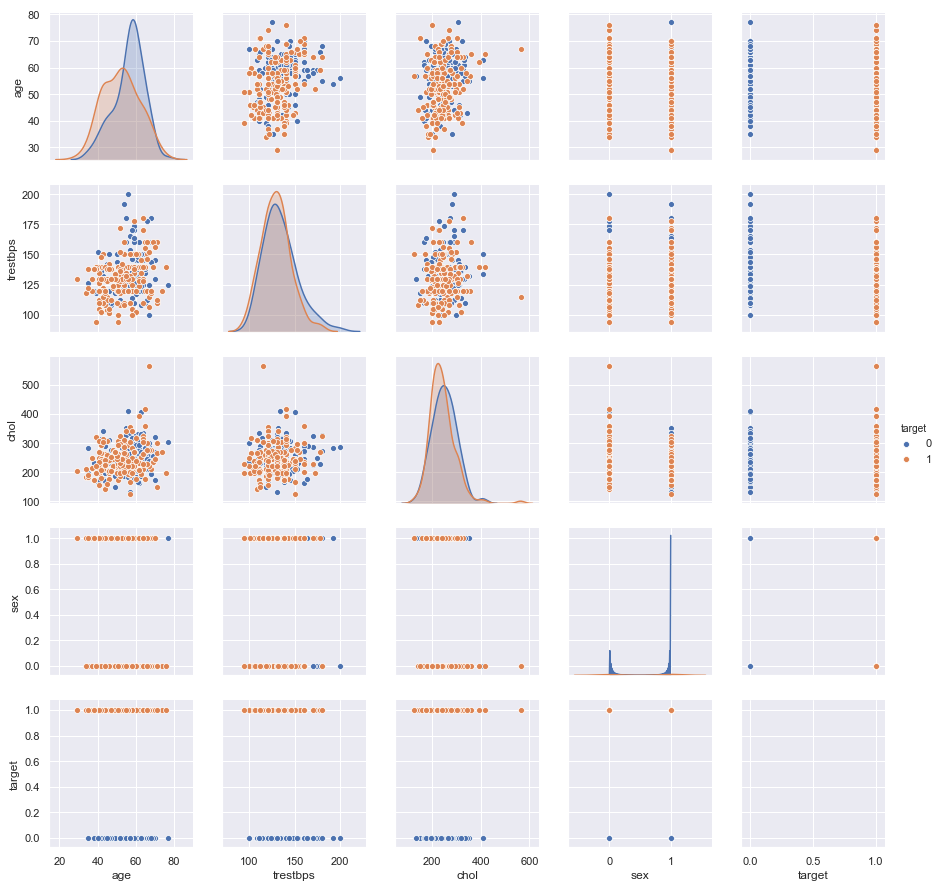

In [278]:
sns.pairplot(example_df, hue ='target')

In [259]:
def boxplot(x_val, y_val='target',data=df):
    boxplot = sns.boxplot(x=x_val,y=y_val,data=data)
    return boxplot

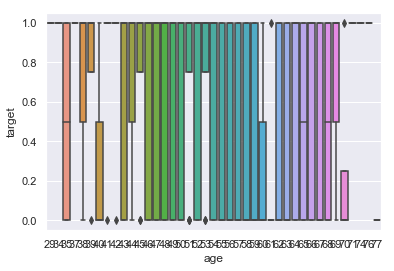

In [263]:
boxplot('age')

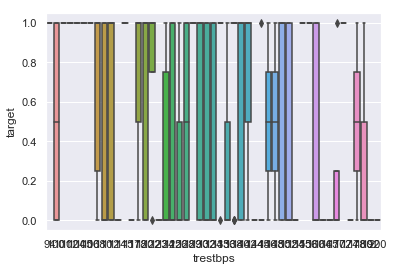

In [264]:
boxplot('trestbps')

In [265]:
# for feature in continuous:
#     print(sns.boxplot(feature))

[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2f740c50>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a317023c8>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a31e047b8>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a32a127f0>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a32c397b8>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a326537b8>]]


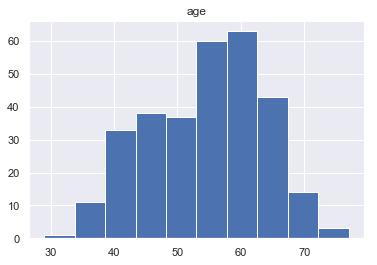

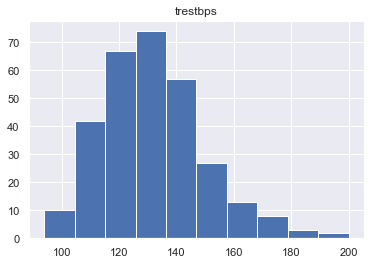

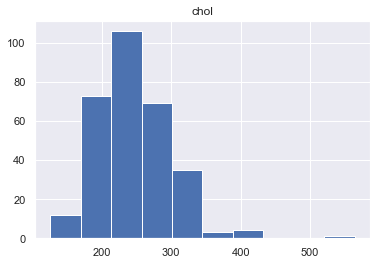

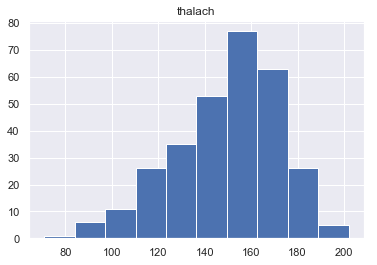

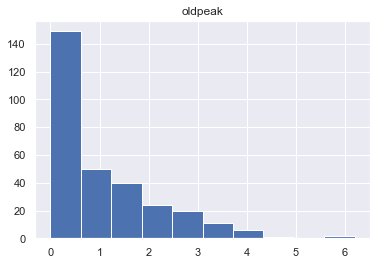

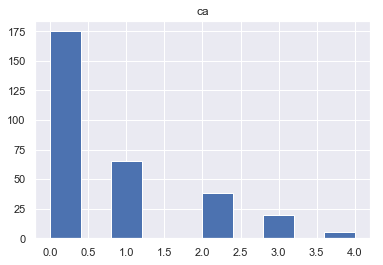

In [233]:
for feature in continuous:
    print(df.hist(feature))

In [306]:
#re-map column values
df.replace({'sex': {0:'female', 1: 'male'},
           'cp': {0: 'typical_angina', 1: 'atypical_angina', 2: 'non-anginal_pain', 3: 'asymptomatic'} }, inplace=True) 

 # Dummy Variables

In [302]:
df.sex.value_counts()

male      207
female     96
Name: sex, dtype: int64

In [299]:
df_new.sex.value_counts()

male      207
female     96
Name: sex, dtype: int64

In [ ]:
def create_dummies(feature, data):
    #Create dummy variables for sex, male = 1, female = 0
    dummy_sex = pd.get_dummies(df['sex'])
    #Change columns names
    dummy_sex.columns = ['female', 'male']
    #Concatenate to original dateframe and drop sex column
    df = pd.concat([df.drop('sex', axis =1), dummy_sex], axis = 1)
    df.head()

In [291]:
#Create dummy variables for sex, male = 1, female = 0
dummy_sex = pd.get_dummies(df['sex'])
#Change columns names
dummy_sex.columns = ['female', 'male']
#Concatenate to original dateframe and drop sex column
df = pd.concat([df.drop('sex', axis =1), dummy_sex], axis = 1)
df.head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,female,male
0,63,3,145,233,1,0,150,0,2.3,0,0,1,1,0,1
1,37,2,130,250,0,1,187,0,3.5,0,0,2,1,0,1
2,41,1,130,204,0,0,172,0,1.4,2,0,2,1,1,0
3,56,1,120,236,0,1,178,0,0.8,2,0,2,1,0,1
4,57,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0


In [158]:
#Create dummy variables for chest pain (cp)
#typical angina=0, atypical agina = 1, non_anginal pain=2, asmptomatic=3
dummy_cp = pd.get_dummies(df['cp'])
#Change columns names
dummy_cp.columns = ['typical angina', 'atypical agina', 'non-anginal pain', 'asmptomatic']
#Concatenate to original dateframe
df = pd.concat([df, dummy_cp], axis = 1)
#Delete original cp column
del df['cp']
df.head()

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,female,male,typical angina,atypical agina,non-anginal pain,asmptomatic
0,63,145,233,1,0,150,0,2.3,0,0,1,1,0,1,0,0,0,1
1,37,130,250,0,1,187,0,3.5,0,0,2,1,0,1,0,0,1,0
2,41,130,204,0,0,172,0,1.4,2,0,2,1,1,0,0,1,0,0
3,56,120,236,0,1,178,0,0.8,2,0,2,1,0,1,0,1,0,0
4,57,120,354,0,1,163,1,0.6,2,0,2,1,1,0,1,0,0,0


In [159]:
#Create dummy variables for fasting blood sugar (fbs)
#fbs>120 mg/di, true = 1, false = 0
dummy_fbs = pd.get_dummies(df['fbs'])
#Change columns names
dummy_fbs.columns = ['fbs_false', 'fbs_true']
#Concatenate to original dateframe
df = pd.concat([df, dummy_fbs], axis = 1)
#Delete original fbs column
del df['fbs']
df.head()

,age,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal,target,female,male,typical angina,atypical agina,non-anginal pain,asmptomatic,fbs_false,fbs_true
0,63,145,233,0,150,0,2.3,0,0,1,1,0,1,0,0,0,1,0,1
1,37,130,250,1,187,0,3.5,0,0,2,1,0,1,0,0,1,0,1,0
2,41,130,204,0,172,0,1.4,2,0,2,1,1,0,0,1,0,0,1,0
3,56,120,236,1,178,0,0.8,2,0,2,1,0,1,0,1,0,0,1,0
4,57,120,354,1,163,1,0.6,2,0,2,1,1,0,1,0,0,0,1,0


In [160]:
#Create dummy variables for resting electrocardiographic results (restecg)
#normal=0, having ST-T wave abnormality=1, probable or definite left ventricular hypertrophy =2
dummy_restecg = pd.get_dummies(df['restecg'])
#Change columns names
dummy_restecg.columns = ['normal', 'ST-T wave abnormality', 'left ventricular hypertrophy']
#Concatenate to original dateframe
df = pd.concat([df, dummy_restecg], axis = 1)
#Delete original restceg column
del df['restecg']
df.head()

,age,trestbps,chol,thalach,exang,oldpeak,slope,ca,thal,target,...,male,typical angina,atypical agina,non-anginal pain,asmptomatic,fbs_false,fbs_true,normal,ST-T wave abnormality,left ventricular hypertrophy
0,63,145,233,150,0,2.3,0,0,1,1,...,1,0,0,0,1,0,1,1,0,0
1,37,130,250,187,0,3.5,0,0,2,1,...,1,0,0,1,0,1,0,0,1,0
2,41,130,204,172,0,1.4,2,0,2,1,...,0,0,1,0,0,1,0,1,0,0
3,56,120,236,178,0,0.8,2,0,2,1,...,1,0,1,0,0,1,0,0,1,0
4,57,120,354,163,1,0.6,2,0,2,1,...,0,1,0,0,0,1,0,0,1,0


In [161]:
#Create dummy variables for excercise induced angina (exang)
#1= yes, 0= no
dummy_exang = pd.get_dummies(df['exang'])
#Change columns names
dummy_exang.columns = ['no', 'yes']
#Concatenate to original dateframe
df = pd.concat([df, dummy_exang], axis = 1)
#Delete original exang column
del df['exang']
df.head()

,age,trestbps,chol,thalach,oldpeak,slope,ca,thal,target,female,...,atypical agina,non-anginal pain,asmptomatic,fbs_false,fbs_true,normal,ST-T wave abnormality,left ventricular hypertrophy,no,yes
0,63,145,233,150,2.3,0,0,1,1,0,...,0,0,1,0,1,1,0,0,1,0
1,37,130,250,187,3.5,0,0,2,1,0,...,0,1,0,1,0,0,1,0,1,0
2,41,130,204,172,1.4,2,0,2,1,1,...,1,0,0,1,0,1,0,0,1,0
3,56,120,236,178,0.8,2,0,2,1,0,...,1,0,0,1,0,0,1,0,1,0
4,57,120,354,163,0.6,2,0,2,1,1,...,0,0,0,1,0,0,1,0,0,1


In [162]:
#Create dummy variables for slope
#upsloping = 0, flat = 1, downsloping = 2
dummy_slope = pd.get_dummies(df['slope'])
#Change columns names
dummy_slope.columns = ['upsloping', 'flat', 'downsloping']
#Concatenate to original dateframe
df = pd.concat([df, dummy_slope], axis = 1)
#Delete original slope column
del df['slope']
df.head()

,age,trestbps,chol,thalach,oldpeak,ca,thal,target,female,male,...,fbs_false,fbs_true,normal,ST-T wave abnormality,left ventricular hypertrophy,no,yes,upsloping,flat,downsloping
0,63,145,233,150,2.3,0,1,1,0,1,...,0,1,1,0,0,1,0,1,0,0
1,37,130,250,187,3.5,0,2,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,41,130,204,172,1.4,0,2,1,1,0,...,1,0,1,0,0,1,0,0,0,1
3,56,120,236,178,0.8,0,2,1,0,1,...,1,0,0,1,0,1,0,0,0,1
4,57,120,354,163,0.6,0,2,1,1,0,...,1,0,0,1,0,0,1,0,0,1


In [164]:
df.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [163]:
#Create dummy variables for thal
#normal= 3, fixed defect = 6, reversable defect= 7
dummy_thal = pd.get_dummies(df['thal'])
#Change columns names
dummy_thal.columns = ['normal', 'fixed defect', 'reversed defect']
#Concatenate to original dateframe
df = pd.concat([df, dummy_thal], axis = 1)
#Delete original fbs column
del df['thal']
df.head()

ValueError: Length mismatch: Expected axis has 4 elements, new values have 3 elements

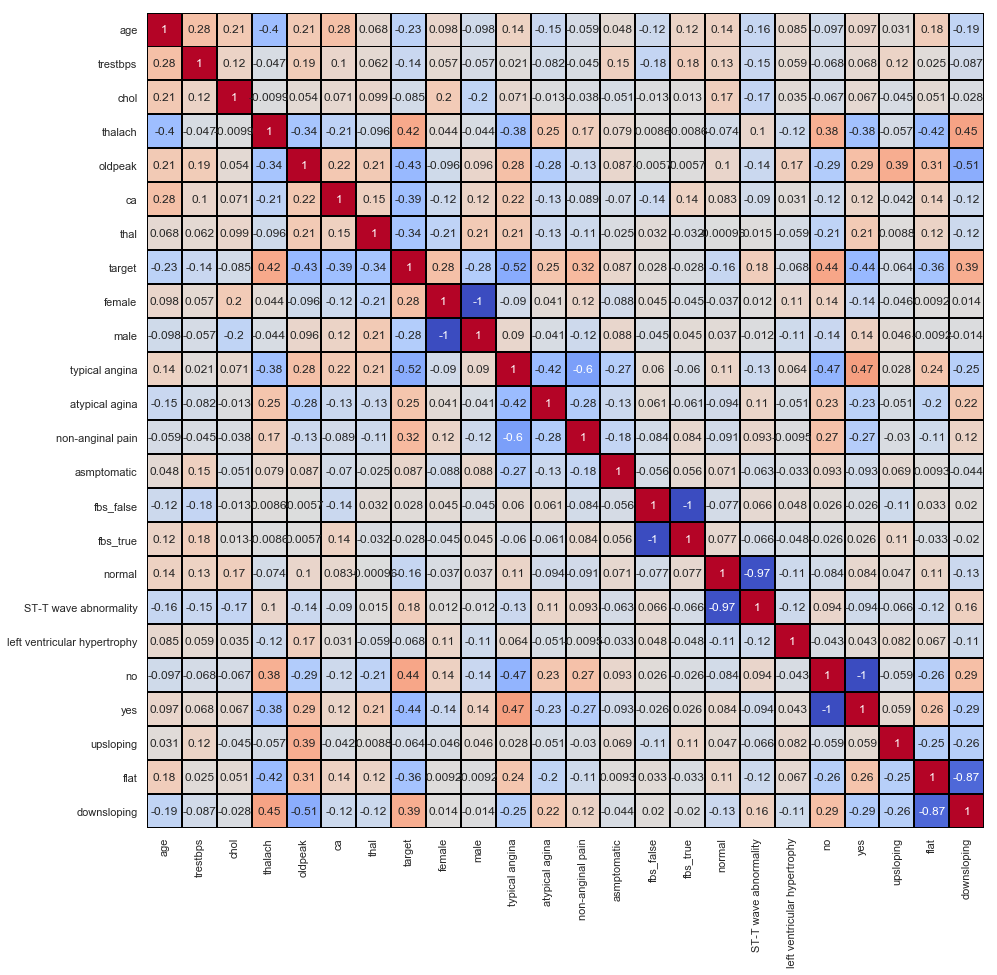

In [172]:
plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), annot = True, fmt = '.2g', cmap= 'coolwarm', linewidths = 1, linecolor = 'black', cbar_kws = {'orientation': 'horizontal'}, cbar=False)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Age vs Cholesterol')

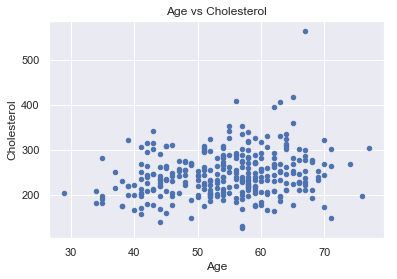

In [66]:
df.plot(kind='scatter', x = 'age', y = 'chol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Age vs Cholesterol')

[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2b2e3ef0>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2b2e3860>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2bc292e8>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2bc66518>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2e7ad470>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2d009860>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2e7ff4e0>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2ee7d588>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2eed3668>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2ef13748>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2f336630>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2f377780>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2f5f4828>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2f634860>]]
[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2f6748d

/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


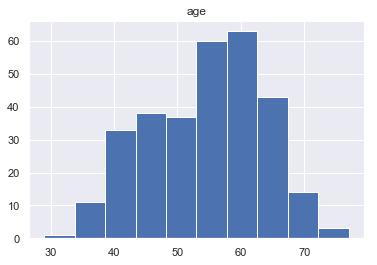

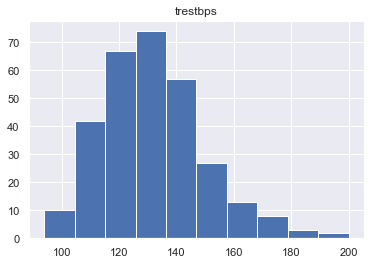

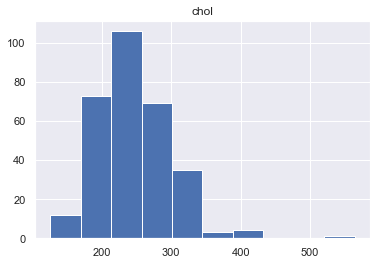

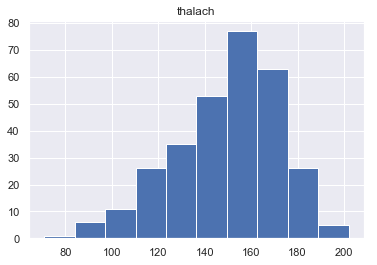

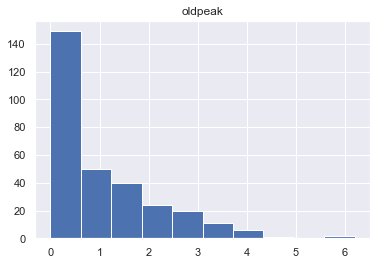

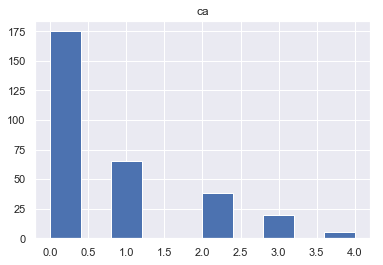

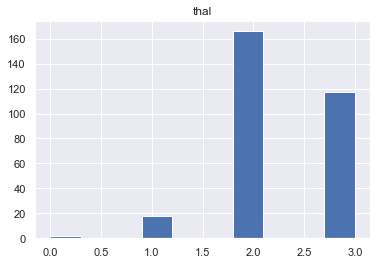

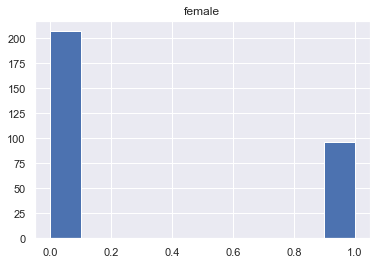

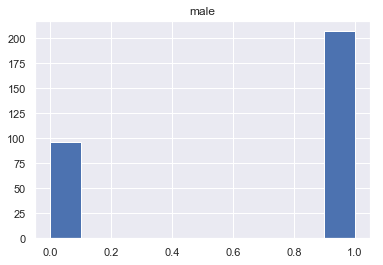

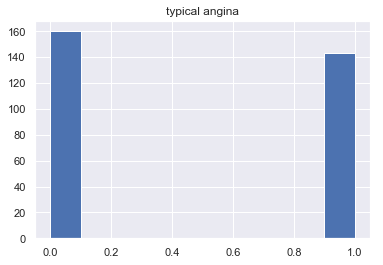

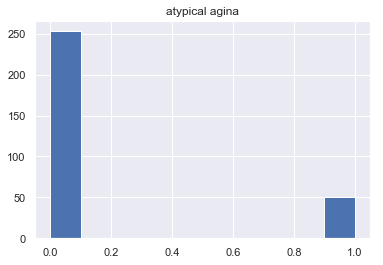

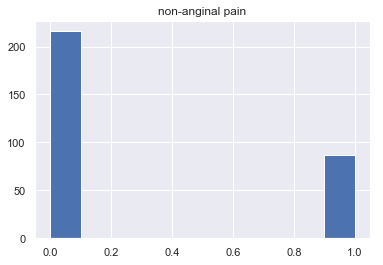

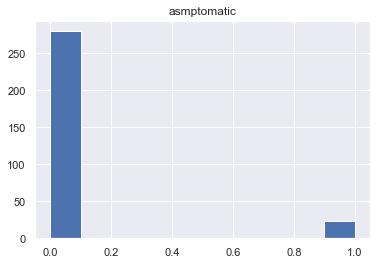

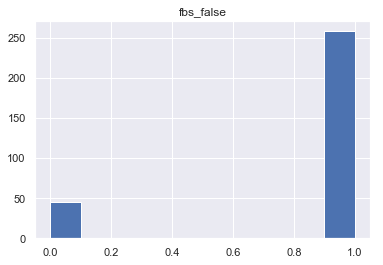

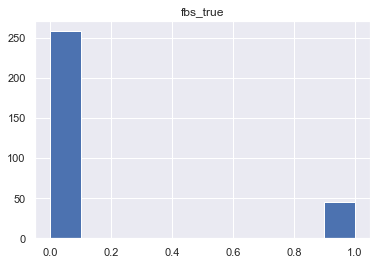

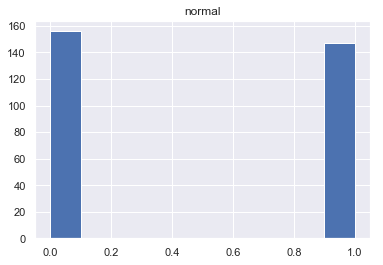

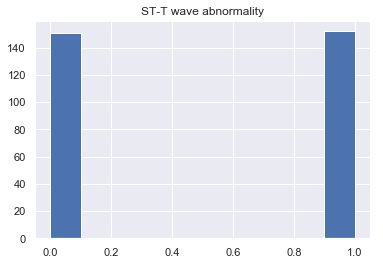

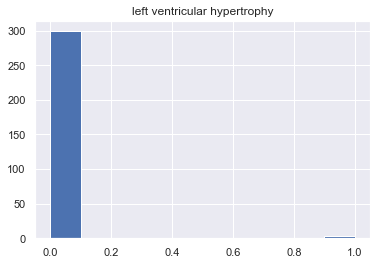

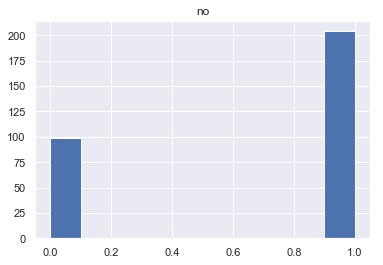

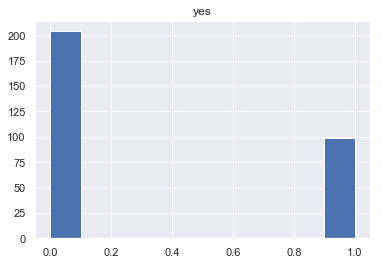

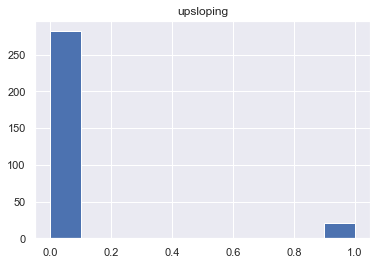

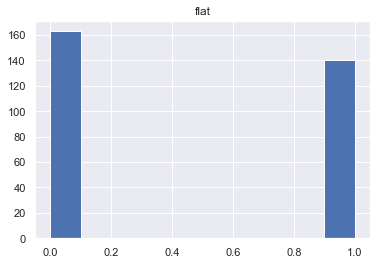

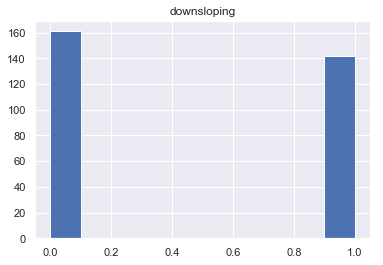

In [173]:
feature_columns = df.columns.drop('target')
for feature in feature_columns:
    print(df.hist(feature))
    

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


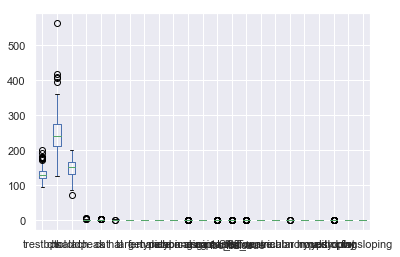

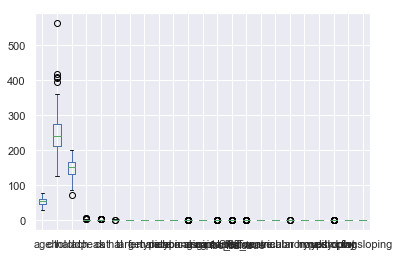

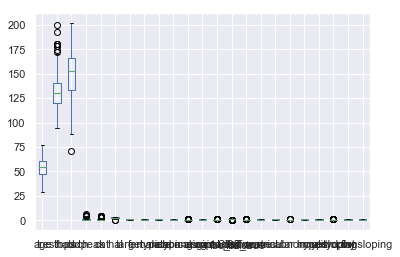

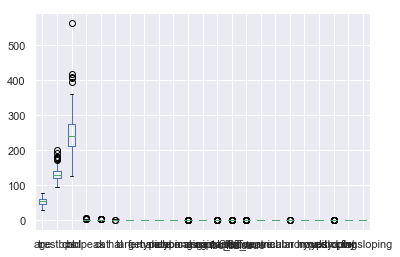

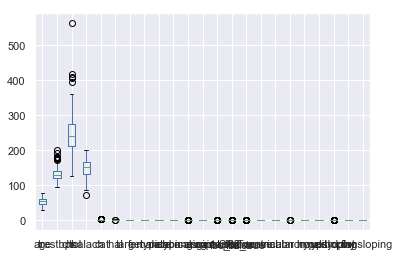

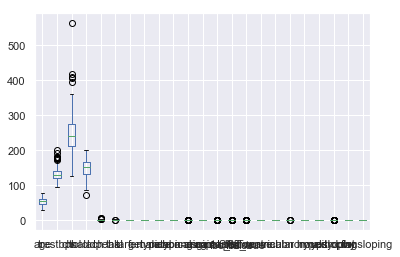

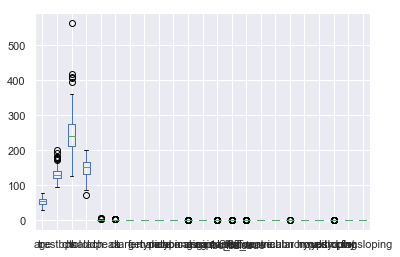

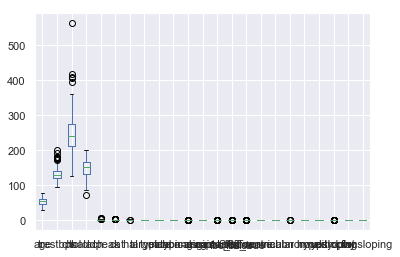

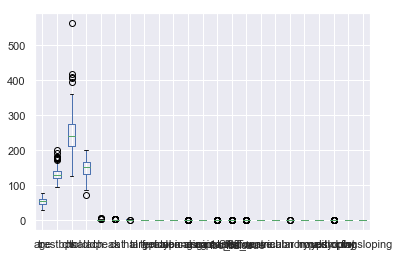

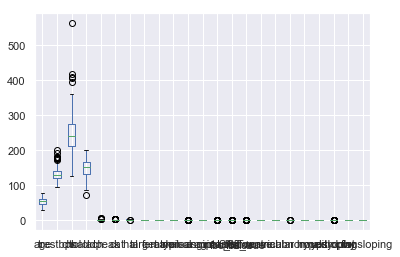

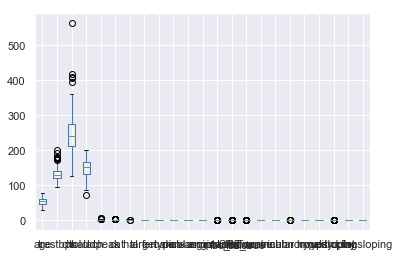

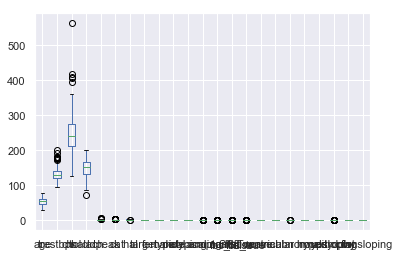

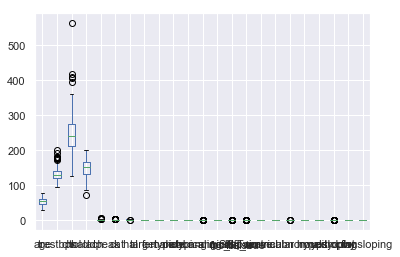

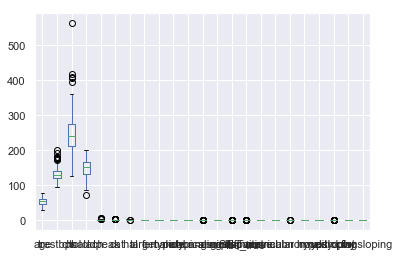

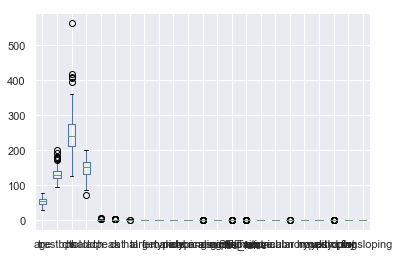

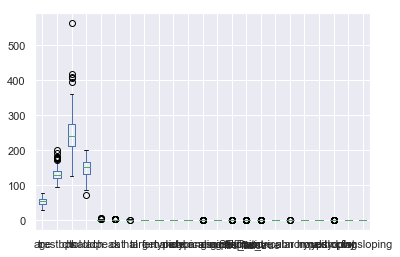

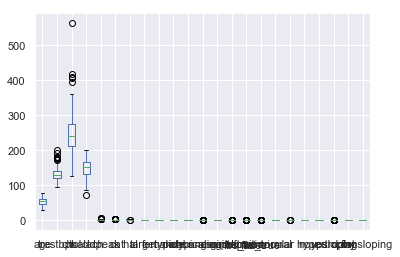

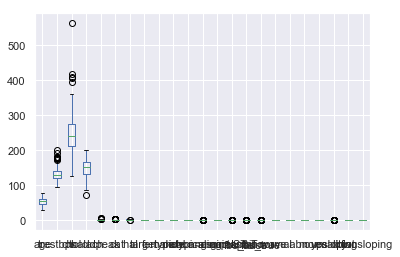

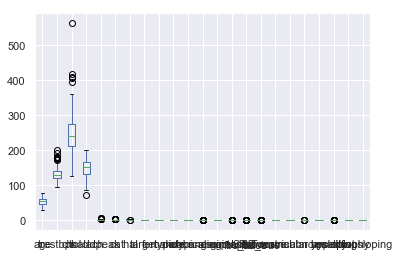

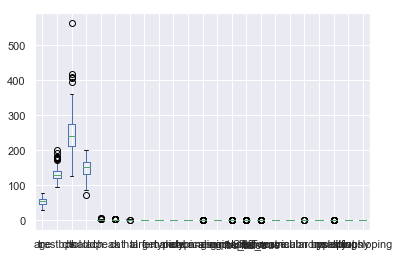

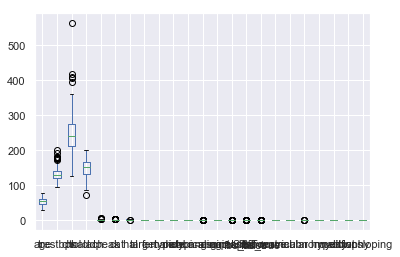

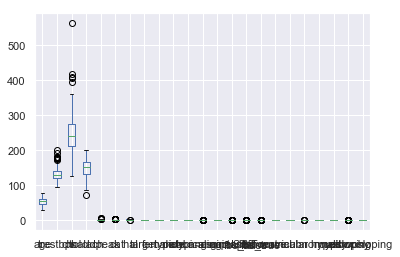

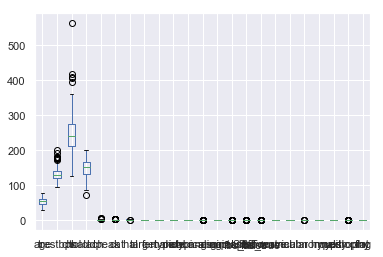

In [177]:
for feature in feature_columns:
    print(df.plot(feature, kind='box'))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Age vs Heart Disease')

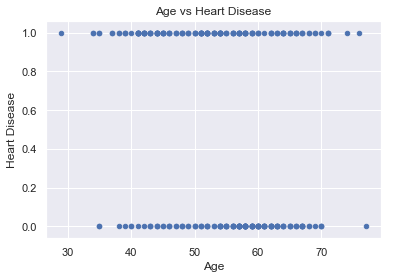

In [174]:
df.plot(kind='scatter', x = 'age', y = 'target')
plt.xlabel('Age')
plt.ylabel('Heart Disease')
plt.title('Age vs Heart Disease')

In [103]:
#bucket into bins every 10 years
df_age =df.groupby('age')['target'].mean().to_frame().reset_index()

Text(0.5, 1.0, 'Age vs Heart Disease')

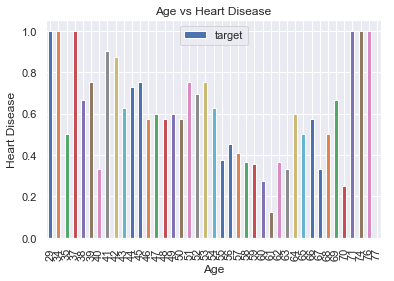

In [175]:
df_age.plot(kind='bar', x = 'age', y = 'target')
plt.xlabel('Age')
plt.ylabel('Heart Disease')
plt.title('Age vs Heart Disease')

In [ ]:
#box plot numeric variable
#

In [ ]:
#bar chart for categorical 

In [ ]:
#make functions for visualizations

# Heart

In [ ]:
#make markdowns to look pretty